## Preamble

In [1]:
SetDirectory["~/Documents/Univ/small_scale_curvaton/math"];

In [304]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## Test

In [202]:
V[x_] = m^2 f^2 (1-Cos[x/f]);
H[t_] = 1/2/t;

In [204]:
m1 = 1;
f1 = 1;
ti = 10^-2/m1;
tf = 10^3/2/m1;
ri1 = \[Pi]-0.001;
ri2 = \[Pi]/2;
ri3 = \[Pi]/4;

The precision of the differential equation (`1`) is less than WorkingPrecision (`2`).:                                                           3 x'[t]                   1                   1
The precision of the differential equation ({{Sin[x[t]] + ------- + x''[t] == 0, x[---] == 3.14059, x'[---] == 0}, {}, {}, {}, {}}) is less than WorkingPrecision (30.).
                                                            2 t                    100                 100

{0.908439, Null}
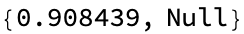

In [211]:
sol1 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri1 f, x'[ti]==0} /. {m->m1,f->f1}, {x[t],x'[t]}, {t,ti,tf}
            ,WorkingPrecision->30 ,MaxSteps->10^6][[1]]; // AbsoluteTiming
sol2 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri2 f, x'[ti]==0} /. {m->m1,f->f1}, {x[t],x'[t]}, {t,ti,tf}][[1]];
sol3 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri3 f, x'[ti]==0} /. {m->m1,f->f1}, {x[t],x'[t]}, {t,ti,tf}][[1]];

In [214]:
xsol1[t_] = x[t] /. sol1;
xsol2[t_] = x[t] /. sol2;
xsol3[t_] = x[t] /. sol3;
xpsol1[t_] = x'[t] /. sol1;
xpsol2[t_] = x'[t] /. sol2;
xpsol3[t_] = x'[t] /. sol3;
rho1[t_] = V[xsol1[t]] + 1/2 xpsol1[t]^2 /. {m->m1,f->f1};
rho2[t_] = V[xsol2[t]] + 1/2 xpsol2[t]^2 /. {m->m1,f->f1};
rho3[t_] = V[xsol3[t]] + 1/2 xpsol3[t]^2 /. {m->m1,f->f1};

-Graphics-
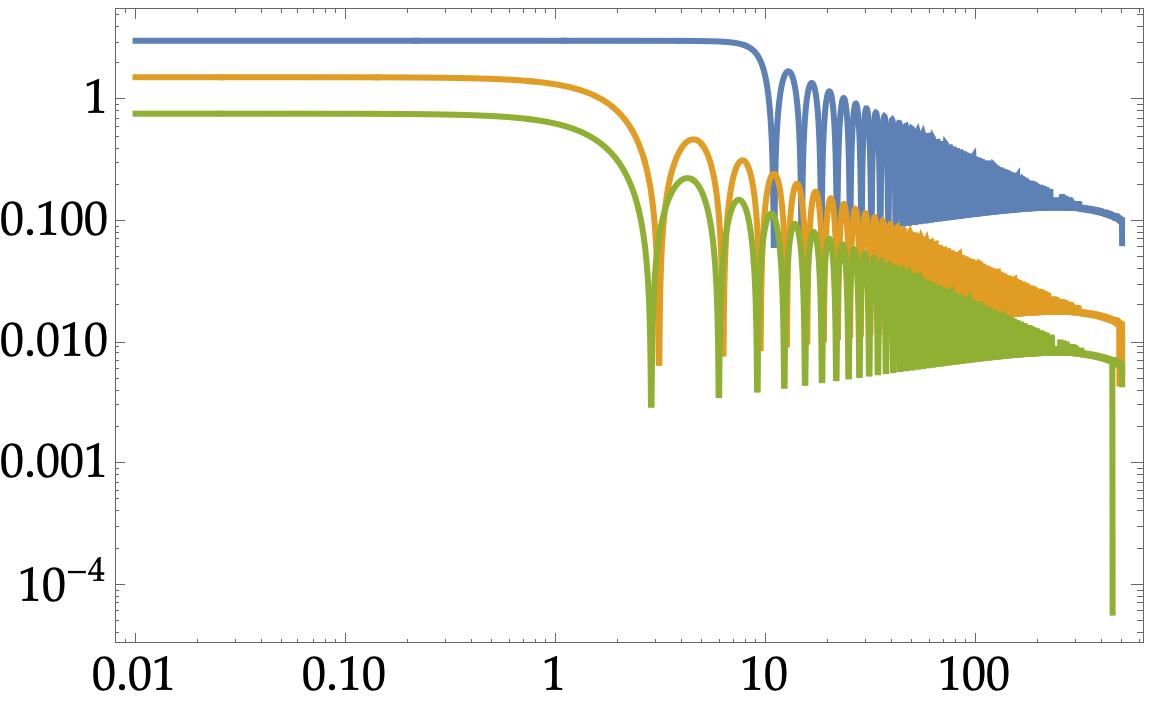

In [223]:
LogLogPlot[{Abs[xsol1[t]],Abs[xsol2[t]],Abs[xsol3[t]]}, {t,ti,tf}(*, PlotRange->{0.01,3}*)]

-Graphics-
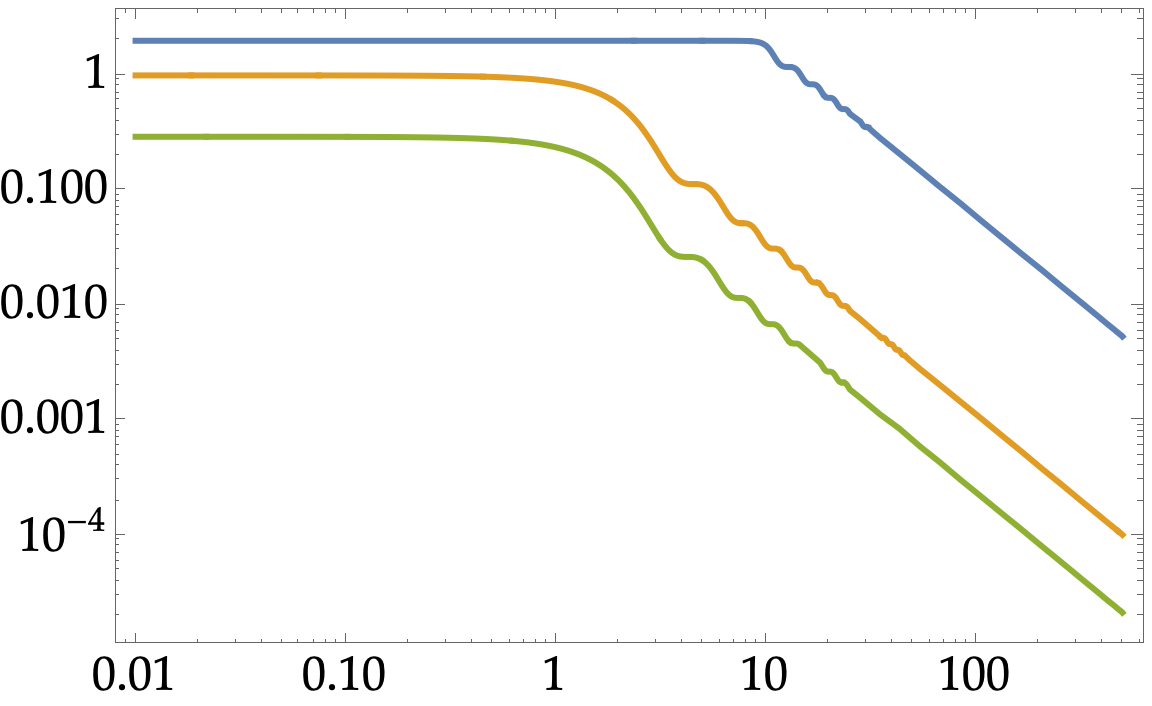

In [224]:
LogLogPlot[{rho1[t], rho2[t], rho3[t]}, {t,ti,tf}]

In [225]:
g1 = Sqrt[2rho1[tf] / m^2] /. {m->m1, f->f1}
g2 = Sqrt[2rho2[tf] / m^2] /. {m->m1, f->f1}
g3 = Sqrt[2rho3[tf] / m^2] /. {m->m1, f->f1}

0.1038030557416259420753900356
0.0142699
0.00655106

-Graphics-
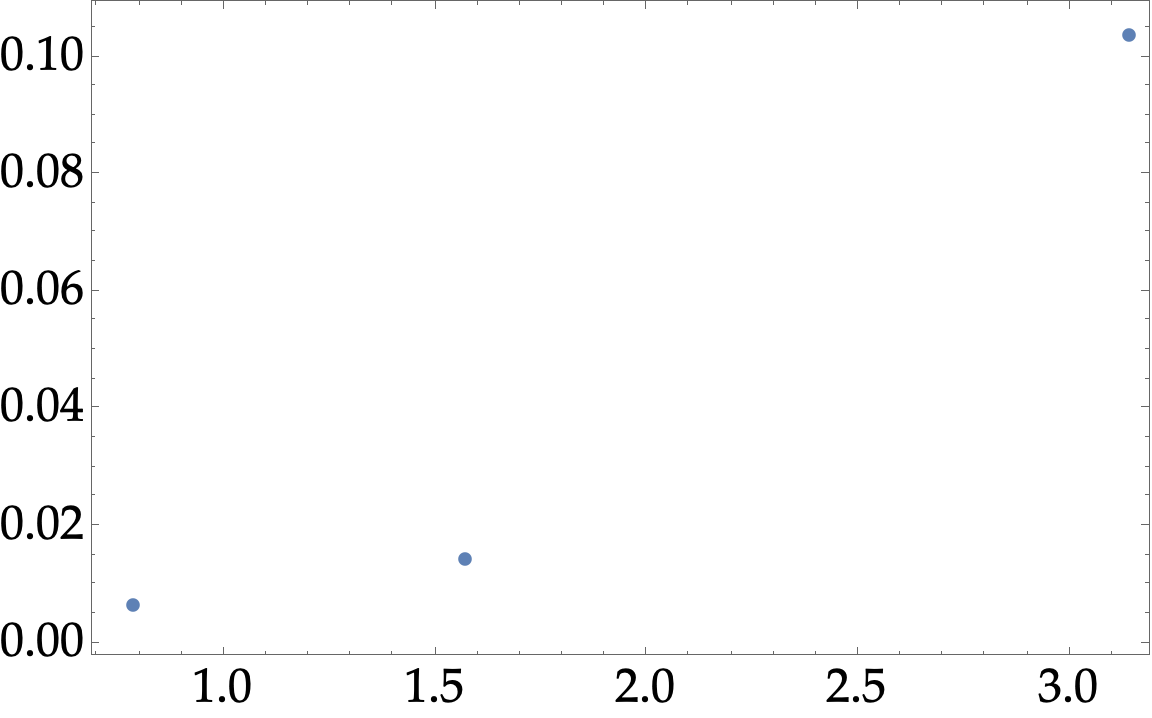

In [228]:
ListPlot[{{ri1,g1},{ri2,g2},{ri3,g3}}, Joined->False]

## cos type

In [507]:
V[x_] = m^2 f^2 (1-Cos[x/f]);
H[t_] = 1/2/t;

In [509]:
V''[0]

2
m

-Graphics-
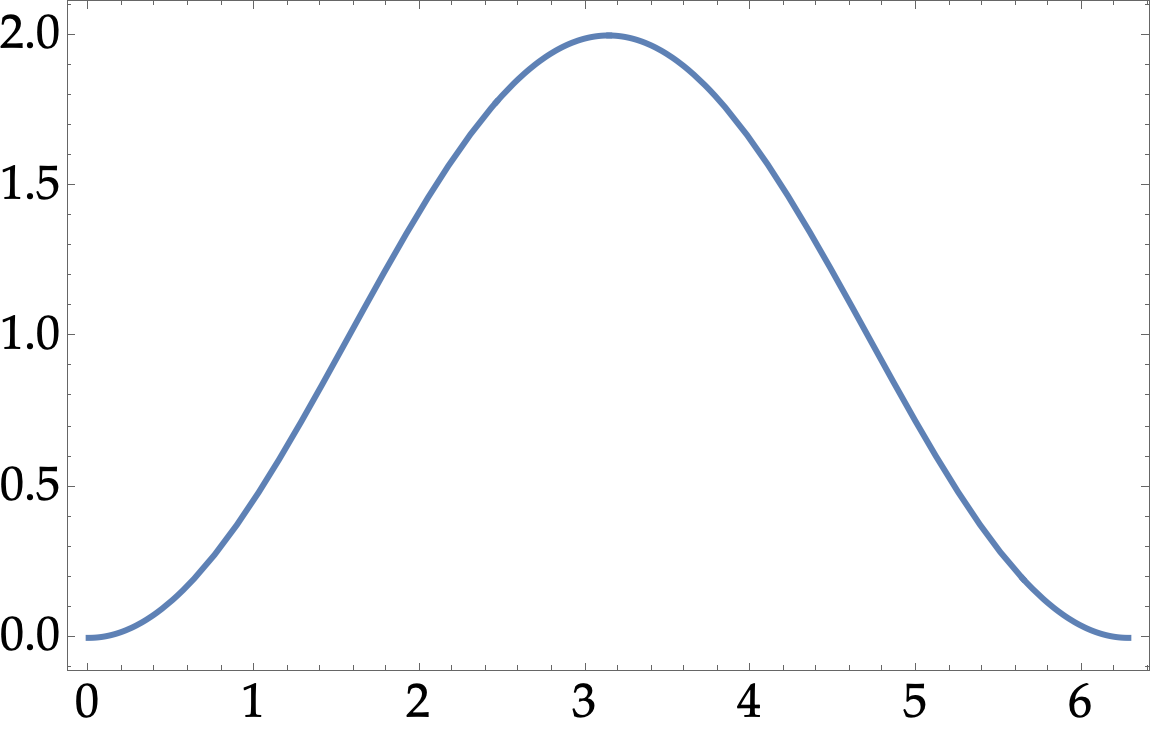

In [510]:
Plot[V[x]/.{m->1,f->1},{x,0,2\[Pi]}]

In [511]:
m1 = 1;
f1 = 1;
ti = 10^-2/m1;
tf = 10^3/2/m1;

{619.127, Null}
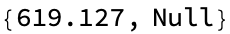

In [516]:
solList = Table[{ri, NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri \[Pi] f, x'[ti]==0} /. {m->m1,f->f1}, 
                        {x[t],x'[t]}, {t,ti,tf}, WorkingPrecision->30 ,MaxSteps->10^6][[1]] // Quiet}, 
            {ri,0,1-0.001,0.001}]; // AbsoluteTiming

In [517]:
gList = Table[{solList[[i,1]], Sqrt[2(V[x[t]] + 1/2 x'[t]^2) /m^2/f^2 /. solList[[i,2]] /. {m->m1,f->f1,t->tf}]}, {i,Length[solList]}];

In [518]:
gint[x_] = Interpolation[gList][x];

In [519]:
padding = {{80,10},{100,10}};

-Graphics-
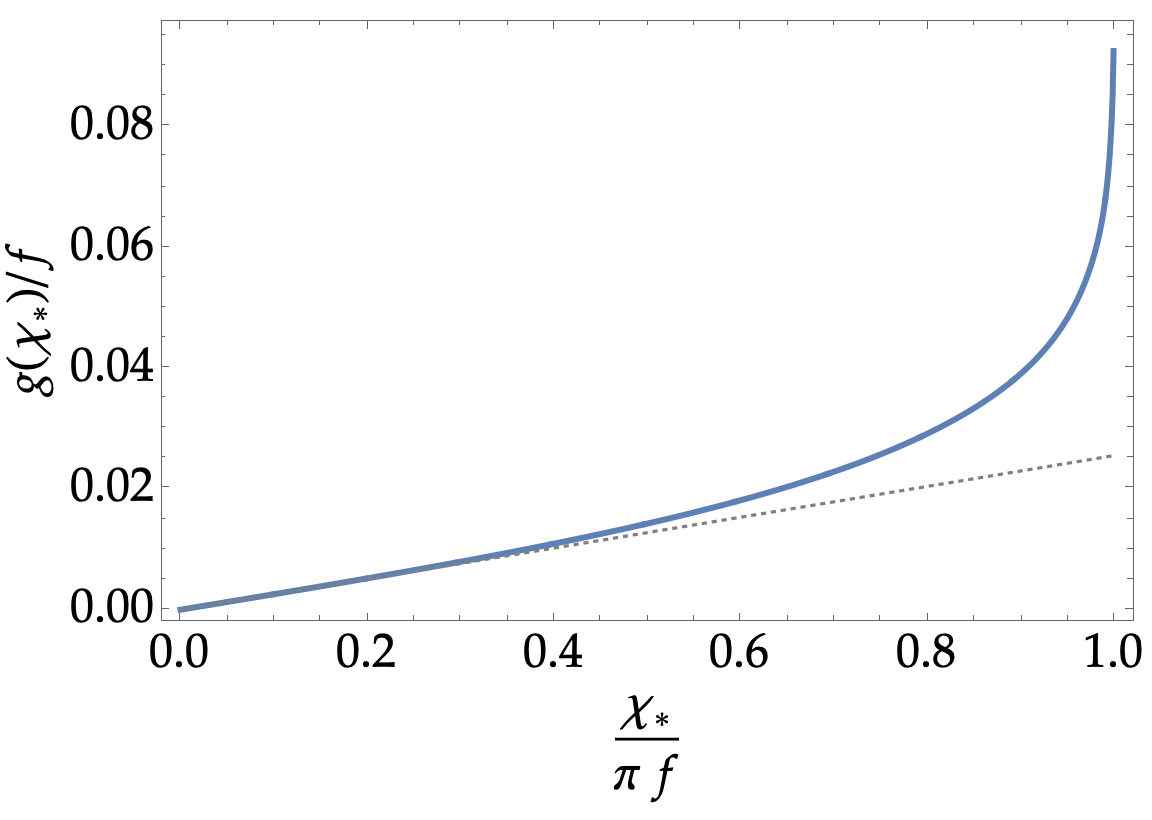

In [522]:
Clear[V]
FiggCos = 
Show[ListPlot[gList,FrameLabel->{{Row[{g[Subscript[\[Chi],"*"]],"/",f}],None}, 
                                {Subscript[\[Chi],"*"]/\[Pi]/f,
                                    (*Row[{V[\[Chi]]==\[CapitalLambda]^4(1-Cos[\[Chi]/f]) ," ,   " 
                                        ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]*) None}}],
    Plot[gint'[0]x,{x,0,1}, PlotStyle->{Gray,Dotted}] 
    ,ImagePadding->padding (*,ImageSize->Medium ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]*)]

In [264]:
Export["g_cos.pdf", FiggCos];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                             2    2   2  (3)
                                                            g  g''   g  g
>       AbsoluteThickness[1.6], Dashing[{Small, Small}]]}, {-------, -------}, 
                                                                4        3
                                                              g'       g'
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.7}, Identity]]
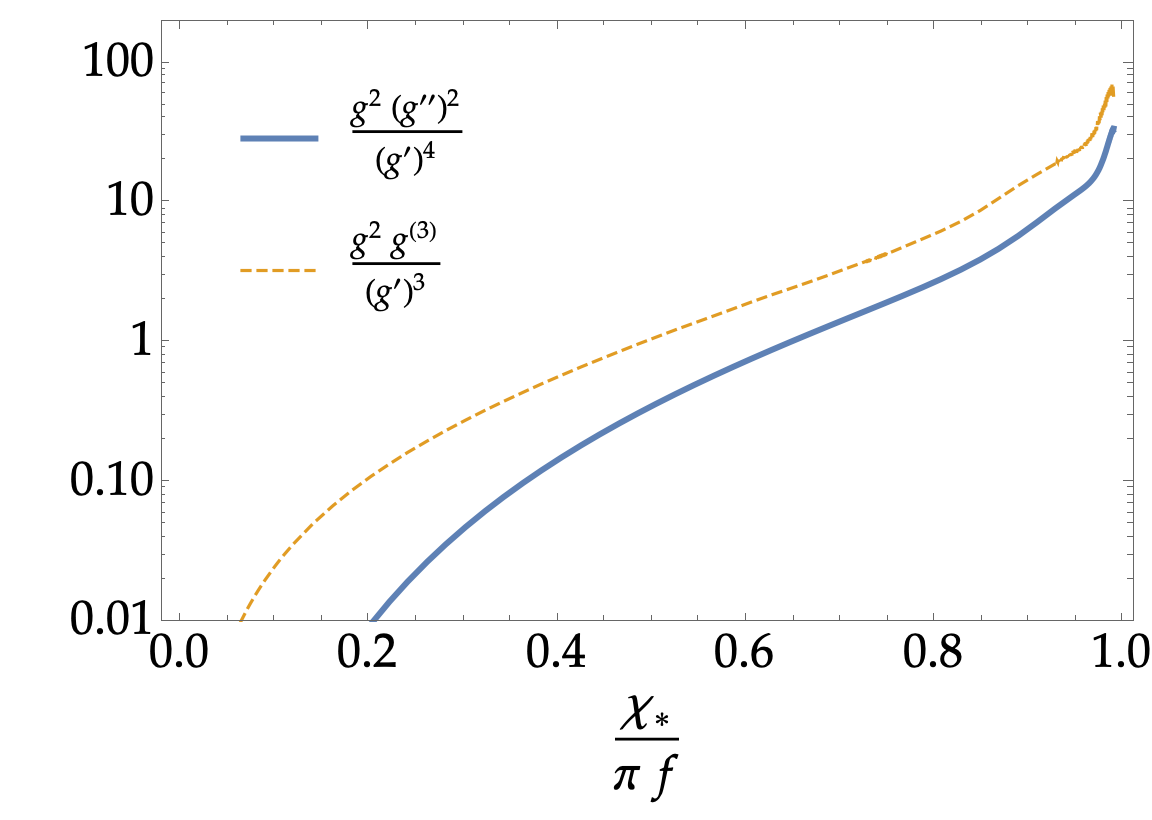

In [524]:
FiggderCos = 
LogPlot[{gint[x]^2gint''[x]^2/gint'[x]^4, gint[x]^2 gint'''[x]/gint'[x]^3}, {x,0,1-0.01} ,PlotRange->{0.01,200}
    ,PlotStyle->{AbsoluteThickness[3],Dashed} ,PlotLegends->Placed[{(g g''/g'^2)^2,g^2g'''/g'^3} ,{0.2,0.7}]
    ,FrameLabel->{{None ,None}, {Subscript[\[Chi],"*"]/\[Pi]/f,
                                    (*Row[{V[\[Chi]]==\[CapitalLambda]^4(1-Cos[\[Chi]/f]) ," ,   " 
                                        ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]*) None}}
    ,ImagePadding->padding (*,ImageSize->Medium ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]*)]

In [267]:
Export["gder_cos.pdf", FiggderCos];

-Graphics-
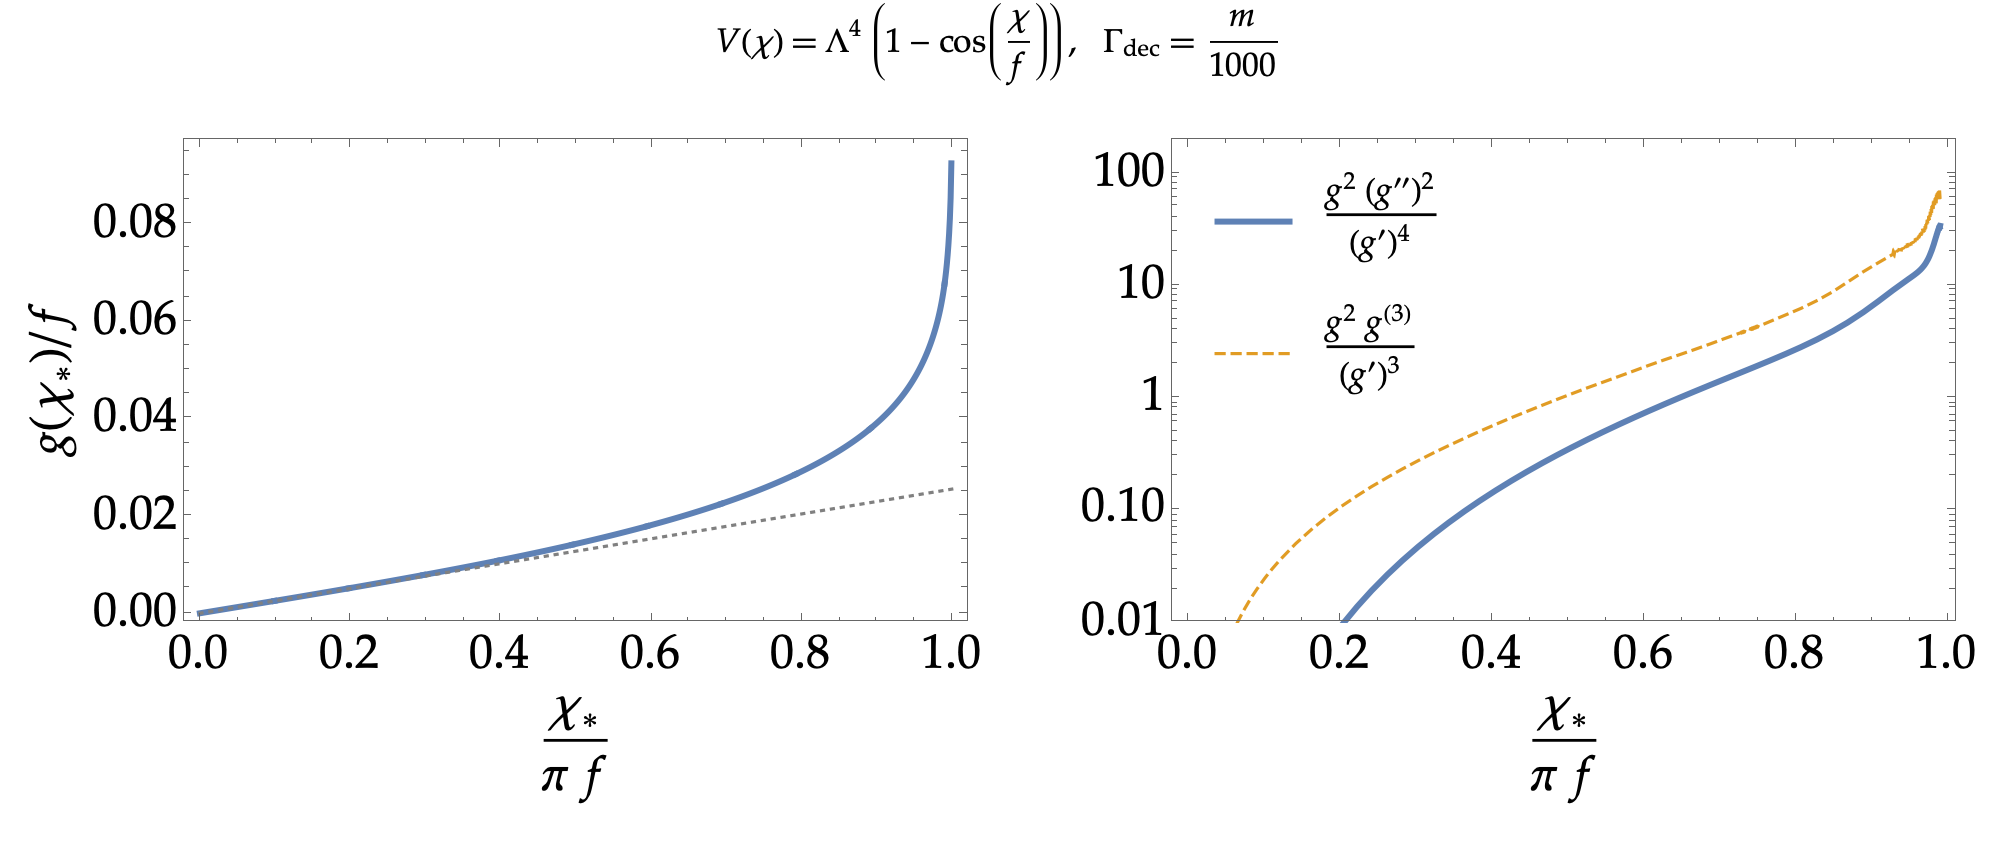

In [525]:
FiggandgderCos = 
Show[GraphicsRow[{FiggCos,FiggderCos} ,ImageSize->1000 ,Spacings->0] 
    ,PlotLabel->Row[{V[\[Chi]]==\[CapitalLambda]^4(1-Cos[\[Chi]/f]) ," ,   " 
                        ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]
    ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]]

In [526]:
Export["g_gder_cos.pdf", FiggandgderCos];

## phi4 type

In [188]:
V[x_] = 1/4 lambda x^4 + 1/2 m^2 x^2;
H[t_] = 1/2/t;

In [256]:
ti = 0.1;
tf = 10^7;
lambda1 = 0.000001;
m1 = 0.00001;

In [275]:
xt = x /. Solve[(1/4 lambda1 x^4) / (1/2 m1^2 x^2) == 1, x][[2]]

0.0141421

In [290]:
sol1 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==1, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        ,WorkingPrecision->30 (*,Method->"ImplicitRungeKutta"*) ,MaxSteps->10^6][[1]]; (*// Quiet*) // AbsoluteTiming
sol2 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==0.1, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        (*,WorkingPrecision->30*) (*,Method->"ImplicitRungeKutta"*)][[1]]; // Quiet // AbsoluteTiming
sol3 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==0.05, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        (*,WorkingPrecision->30*) (*,Method->"ImplicitRungeKutta"*)][[1]]; // Quiet // AbsoluteTiming

The precision of the differential equation (`1`) is less than WorkingPrecision (`2`).:                                                    -10             -6     3   3 x'[t]
The precision of the differential equation ({{1. 10    x[t] + 1. 10   x[t]  + ------- + x''[t] == 0, x[0.1] == 1, x'[0.1] == 0}, {}, {}, {}, {}}) is less than WorkingPrecision (30.).
                                                                                2 t

{4.27261, Null}
{0.010882, Null}
{0.008975, Null}

In [293]:
xsol1[t_] = x[t] /. sol1;
xsol2[t_] = x[t] /. sol2;
xsol3[t_] = x[t] /. sol3;
xpsol1[t_] = x'[t] /. sol1;
xpsol2[t_] = x'[t] /. sol2;
xpsol3[t_] = x'[t] /. sol3;
rho1[t_] = V[xsol1[t]] + 1/2 xpsol1[t]^2 /. {lambda->lambda1,m->m1};
rho2[t_] = V[xsol2[t]] + 1/2 xpsol2[t]^2 /. {lambda->lambda1,m->m1};
rho3[t_] = V[xsol3[t]] + 1/2 xpsol3[t]^2 /. {lambda->lambda1,m->m1};

-Graphics-
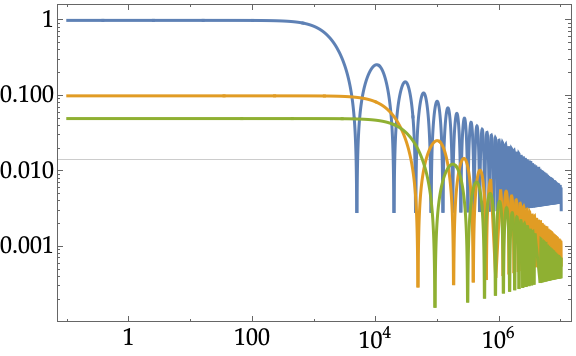

In [302]:
LogLogPlot[{Abs[xsol1[t]], Abs[xsol2[t]], Abs[xsol3[t]]}, {t,ti,tf} ,GridLines->{None,{xt}}]

-Graphics-
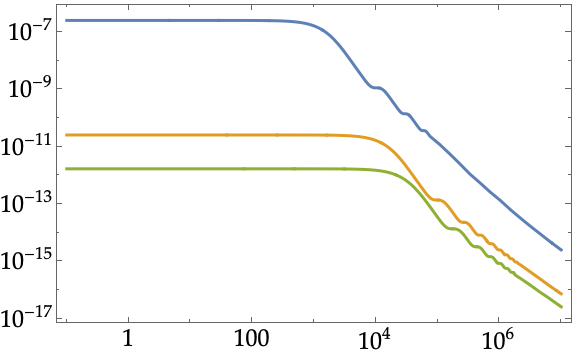

In [289]:
LogLogPlot[{rho1[t],rho2[t],rho3[t]},{t,ti,tf}]

In [303]:
solList = Table[{ri, NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri, x'[ti]==0} /. {lambda->lambda1,m->m1}, 
                        {x[t],x'[t]}, {t,ti,tf} ,WorkingPrecision->30 ,MaxSteps->10^6 (*,Method->"ImplicitRungeKutta"*)][[1]] // Quiet}, 
            {ri,0,1,0.01}]; // AbsoluteTiming

{322.124, Null}

In [304]:
gList = Table[{solList[[i,1]], Sqrt[V[x[t]] + 1/2 x'[t]^2 /. solList[[i,2]] /. {lambda->lambda1,m->m1,t->tf}]}, {i,Length[solList]}];

In [305]:
gfit[x_] = a x + b /. FindFit[Select[gList,#[[1]]>0.5&], a x+b, {a,b}, x]

-9             -8
8.4469 10   + 4.19172 10   x

-Graphics-
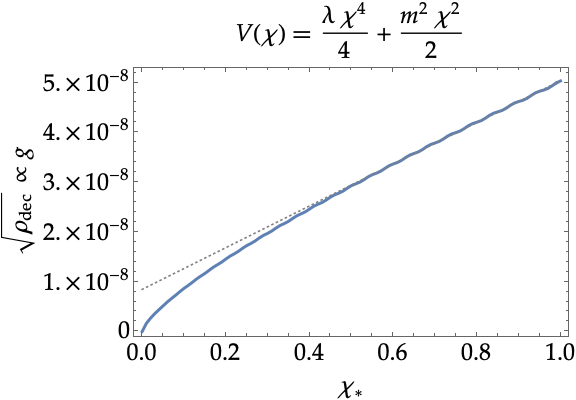

In [313]:
Clear[V]
Figgphi4 = 
Show[ListPlot[gList ,FrameLabel->{{Row[{Sqrt[Subscript[\[Rho],"dec"]], " ∝ ", g}] ,None}, 
                                {Subscript[\[Chi],"*"] ,V[\[Chi]]==1/2 m^2 \[Chi]^2 + 1/4 \[Lambda] \[Chi]^4}}] 
    ,Plot[gfit[x] ,{x,0,1}　,PlotStyle->{Gray,Dotted}]]

In [315]:
Export["g_phi4.pdf" ,Figgphi4];

In [158]:
gint[x_] = Interpolation[gList][x];

-Graphics-
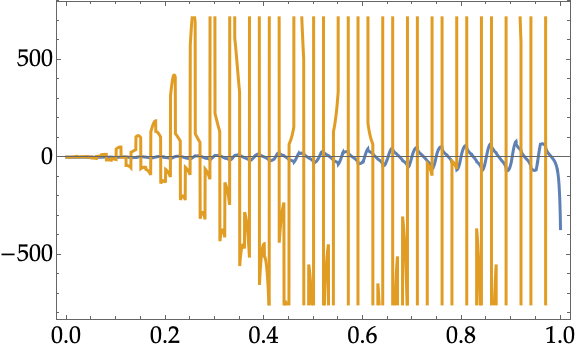

In [58]:
Plot[{gint[x]gint''[x]/gint'[x]^2, gint[x]^2 gint'''[x]/gint'[x]^3}, {x,0,1}]